<a href="https://colab.research.google.com/github/jakubmis1998/NeuralNetworks/blob/main/SPLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

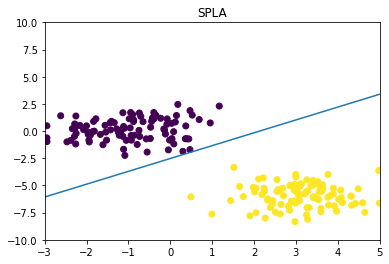

In [175]:
# SPLA (Simple Perceptron Learning Algorithm)

import numpy as np
from matplotlib import pyplot as plt
from IPython import display

def draw_plot(E, T, w, THETA):
  x1, x2 = -3.0, 5.0
  plt.cla()
  plt.title("SPLA")
  plt.xlim(x1, x2)
  plt.ylim(-10, 10)
  plt.scatter(E[:, 0], E[:, 1], c=T)
  plt.plot([x1, x2], [-w[0]/w[1] * x1 + THETA/w[1], -w[0]/w[1] * x2 + THETA/w[1]]);
  display.display(plt.gcf())
  display.clear_output(wait=True)

if __name__ == "__main__":
  # 100 samples 2D moved over [-1, 0]
  A = np.random.randn(100, 2) + [-1, 0]
  # First and second column
  Ax = A[:, 0]
  Ay = A[:, 1]
  # plt.scatter(Ax, Ay)

  # 100 samples 2D moved over [3, -6]
  B = np.random.randn(100, 2) + [3, -6]
  Bx = B[:, 0]
  By = B[:, 1]
  # plt.scatter(Bx, By)

  # Samples for perceptron learning
  E = np.zeros((200, 2))
  E[0:100] = A
  E[100:200] = B

  # True results for perceptron learning
  T = np.zeros((200,))
  T[0:100] = -1
  T[100:200] = 1

  # Perceptron learning variables
  if_learning = True
  learning_rate = 0.1
  k = 100
  N = 2
  THETA = np.random.default_rng().uniform(-1, 1, 1)[0]  # Random THETA [-1, 1)
  w = np.random.default_rng().uniform(-1, 1, 2)  # Random weights [-1, 1)
  classified = np.full(k * N, False)  # Processed samples

  # Perceptron learning
  while if_learning:
    # Random index of examples
    j = np.random.randint(0, 200)

    # Output - result of the neural operation on E[j] - single sample
    O = 1 if np.dot(w, E[j]) - THETA >= 0 else -1

    # Calculate error
    ERR = T[j] - O

    # Unclassified sample
    if ERR != 0:
      # Weights and THETA calculate
      w += learning_rate * ERR * E[j]
      THETA -= learning_rate * ERR
      draw_plot(E, T, w, THETA)  # Update plot
      classified = np.full(k * N, False)  # Reset classified samples
    else:
      # Classified sample
      classified[j] = True  # Set as classified
    
    # All samples classified -> end of learning
    if np.all(classified):
      if_learning = False

  # Draw plot
  draw_plot(E, T, w, THETA)
